## Στοιχεία Ομάδας

Αριθμός Ομάδας: F05

    > Καρυπιάδης Ευστράτιος: 03114911
    > Σταματελόπουλος Νικόλαος: 03116138

---

## Reading, Resizing and Combining

Θα ξεκινήσπυμε διαβάζοντας τις εικόνες προσώπων, κάθε μία από τις οποίες θα προσαρμόσουμε σε διαστάσεις `(512, 288)` με χρήση της συνάρτησης `resize`. Στη συνέχεια θα τις συνθέσουμε σε μία κοινή εικόνα με βοήθεια της συνάρτησης `numpy.concatenate`.

In [0]:
import skimage
import numpy as np
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt
from skimage import img_as_float, img_as_ubyte

# Reading image files
face_image1 = img_as_float(io.imread('1.jpg'))
face_image2 = img_as_float(io.imread('2.jpg'))

# # Rescaling to desired dimensions
face_image1_resized = resize(face_image1, (512, 288), anti_aliasing=True)
face_image2_resized = resize(face_image2, (512, 288), anti_aliasing=True)

# Concatinating horizontally to one image
final_image = np.concatenate((face_image1_resized, face_image2_resized), axis=1)

---

## Color Space

Για χρωματικό χώρο επίλεγουμε τον [HSV](https://bit.ly/2Auy7Ml). Η επιλογή μας βασίζεται κυρίως σε επιστημονικές [δημοσιεύσεις](https://bit.ly/3dOLUMc), οι οποίες καταλήγουν ότι ο συγκεκριμένος χρωματικός χώρος είναι ιδανικός για την ανίχνευση ακμών σε έγχρωμες εικόνες. Αξίζει να παρατηρήσουμε ότι η τρίτη διάσταση, *Value*, του συγκεκριμένου χώρου θα μπορούσε να θεωρηθεί ισοδύναμη με την εικόνα μας σε ασπρόμαυρες αποχρώσεις, μία μορφή που ενδείκνυται για ανίχνευση ακμών. 

In [0]:
from skimage import color

# Selecting HSV color space
final_image_hsv = color.rgb2hsv(final_image)

---

## Adding Noise

Θα προσθέσουμε δύο ειδών θορύβου στην εικόνα μας, για να παράξουμε δύο νέες εικόνες, στις οποίες θα βασιστούμε για τη συνέχεια της άσκησης. Πιο συγκεκριμένα, θα προσθέσουμε Gaussian και Salt & Pepper θόρυβο.

In [0]:
from skimage.util import random_noise

def snpAmount(digit):
  return 1/90*digit + 0.3 

# Adding noise
gaussian_image = random_noise(final_image_hsv, mode='gaussian', seed=8) # selecting 8 from 03116138
saltpepper_image = random_noise(final_image_hsv, mode='s&p', seed=42, amount=snpAmount(8)) # selecting 8 from 03116138

---

## Filtering

Για αποθορυβοποίηση των εικόνων μας θα δοκιμάσουμε τρία διαφορετικά φίλτρα: Mean, Gaussian και Median. Επειδή οι εικόνες με τις οποίες δουλεύουμε είναι 3 διαστάσεων, σημειώνουμε ότι η αποθορυβοποίηση λαμβάνει χώρα και στα 3 κανάλια της εικόνας, τα εκάστοτε αποτελέσματα της οποίας συνθέτουμε σε μία τελική εικόνα με χρήση της συνάρτησης `numpy.dstack`. 

Για οπτικοποίηση των αποτελεσμάτων μας υλοποιούμε τη συνάρτηση `imcmp`, η οποία πρόκειται να συγκρίνει, τουλάχιστον οπτικά, την αποδοτικότητα των φίλτρων που θα δοκιμάσουμε.

In [0]:
def imcmp(image_set, title_set):

  """
  Summary:
  -----------
  Plots images for comparison purposes.

  Parameters:
  -----------
  image_set : list of numpy.ndarray, images on HSV colorspace
  title_set : list of strings, titles of respective images given

  Returns:
  -----------
  None
  """

  fig, axes = plt.subplots(1, 4, figsize=(25, 15))
  for ax in axes:
    ax.axis('off') # discard axes
  
  (ax_gaussianNoise, ax_meanFilter, ax_gaussianFilter, ax_medianFilter) = axes

  ax_gaussianNoise.imshow(color.hsv2rgb(image_set[0]))
  ax_gaussianNoise.set_title(title_set[0])
  ax_meanFilter.imshow(color.hsv2rgb(image_set[1]))
  ax_meanFilter.set_title(title_set[1])
  ax_gaussianFilter.imshow(color.hsv2rgb(image_set[2]))
  ax_gaussianFilter.set_title(title_set[2])
  ax_medianFilter.imshow(color.hsv2rgb(image_set[3]))
  ax_medianFilter.set_title(title_set[3])

Στη συνέχεια ακολουθούν δοκιμές των παραπάνω φίλτρων μεταβάλλοντας τις αντίστοιχες εκάστοτε παραμέτρους.

### Gaussian Noise Image

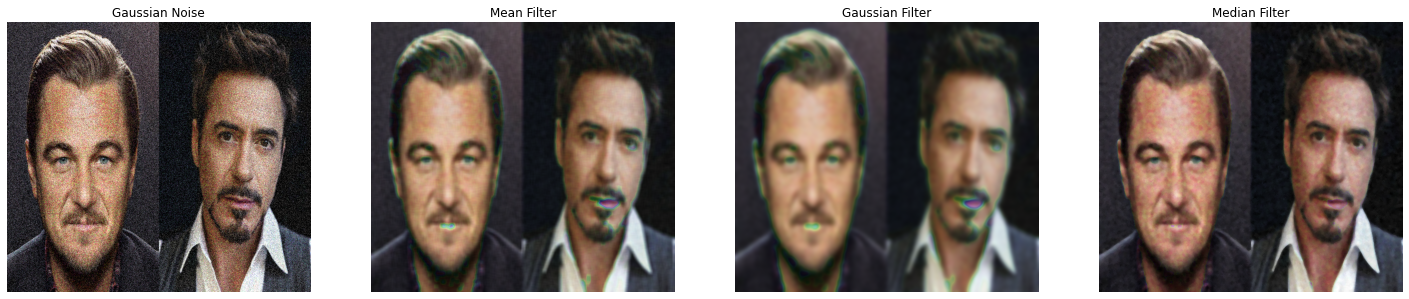

In [5]:
from scipy import ndimage
from skimage import filters
from skimage.morphology import disk

# Mean filter
mean_kernel = np.full((8, 8), 1/64)
mean_filteredH = ndimage.convolve(gaussian_image[:, :, 0], mean_kernel)
mean_filteredS = ndimage.convolve(gaussian_image[:, :, 1], mean_kernel)
mean_filteredV = ndimage.convolve(gaussian_image[:, :, 2], mean_kernel)
mean_filtered_gaussian = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV))

# Gaussian filter
sigma = 4
gaus_filteredH = filters.gaussian(gaussian_image[:, :, 0], sigma)
gaus_filteredS = filters.gaussian(gaussian_image[:, :, 1], sigma)
gaus_filteredV = filters.gaussian(gaussian_image[:, :, 2], sigma)
gaus_filtered_gaussian = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV))

# Median filter
neighborhood = disk(4)
median_filteredH = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 0]), neighborhood)
median_filteredS = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 1]), neighborhood)
median_filteredV = filters.rank.median(img_as_ubyte(gaussian_image[:, :, 2]), neighborhood)
median_filtered_gaussian = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV)))

# Compare results
imcmp([gaussian_image, mean_filtered_gaussian, gaus_filtered_gaussian, median_filtered_gaussian], ['Gaussian Noise', 'Mean Filter', 'Gaussian Filter', 'Median Filter'])

### Salt & Pepper Noise Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


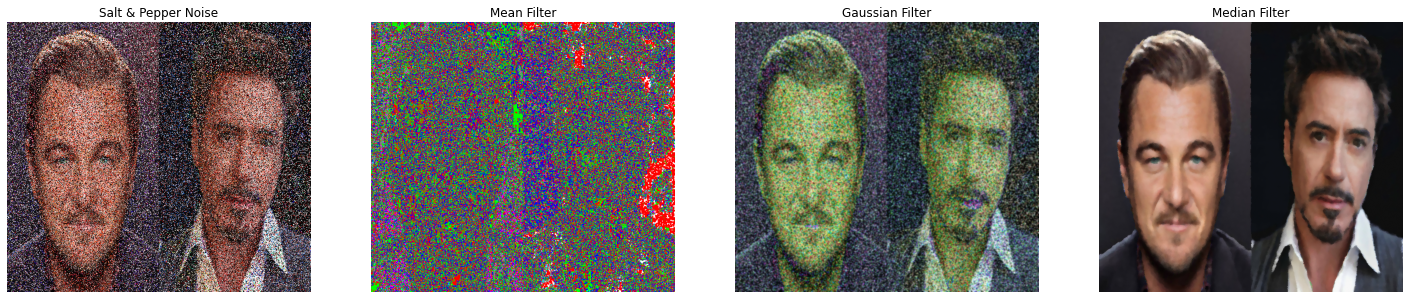

In [6]:
# Mean filter
mean_kernel = np.full((3, 3), 9)
mean_filteredH = ndimage.convolve(saltpepper_image[:, :, 0], mean_kernel)
mean_filteredS = ndimage.convolve(saltpepper_image[:, :, 1], mean_kernel)
mean_filteredV = ndimage.convolve(saltpepper_image[:, :, 2], mean_kernel)
mean_filtered_snp = np.dstack((mean_filteredH, mean_filteredS, mean_filteredV))

# Gaussian filter
sigma = 1
gaus_filteredH = filters.gaussian(saltpepper_image[:, :, 0], sigma)
gaus_filteredS = filters.gaussian(saltpepper_image[:, :, 1], sigma)
gaus_filteredV = filters.gaussian(saltpepper_image[:, :, 2], sigma)
gaus_filtered_snp = np.dstack((gaus_filteredH, gaus_filteredS, gaus_filteredV))

# Median filter
neighborhood = disk(4)
median_filteredH = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 0]), neighborhood)
median_filteredS = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 1]), neighborhood)
median_filteredV = filters.rank.median(img_as_ubyte(saltpepper_image[:, :, 2]), neighborhood)
median_filtered_snp = img_as_float(np.dstack((median_filteredH, median_filteredS, median_filteredV)))

imcmp([saltpepper_image, mean_filtered_snp, gaus_filtered_snp, median_filtered_snp], ['Salt & Pepper Noise', 'Mean Filter', 'Gaussian Filter', 'Median Filter'])

Συμπεράσματα ...

In [0]:
gaussian_final = median_filtered_gaussian
saltpepper_final = median_filtered_snp

---

## Edge Detection

Για την ανίχνευση ακμών θα χρησιμοποιήσουμε τρία διαφορετικά φίλτρα: Laplacian, Canny και Marr-Hildreth. Όπως και στις μεθόδους αποκωδικοποίσης θα εφαρμόσουμε την ανίνχευση και στις 3 διαστάσεις, εμφανίζοντας τα απότελεσματα τις εκάστοτε διάστασης με διαφορετικό χρώμα.

In [0]:
from scipy import signal
from skimage import feature
from skimage.filters import laplace, sobel


def cartoonify(image, method, sigma=None):
  
    """
    Summary:
    -----------
    Cartoonifies image given by replacing detected edges with black color. Input image is remained
    unchanged. Edge detection follows one of three available methods.
    
    Parameters:
    -----------
    image : numpy.ndarray, image on HSV colorspace
    method : string, edge detection method: laplacian, canny, marr-hildreth, sobel
    sigma : float, default = None, sigma value for canny method

    Returns:
    -----------
    RBG-image with detected edges on each dimension, cartoonified input image
    """

    if method == "laplacian":
      laplacian_kernel = [[-1,-1,-1],[-1, 8, -1],[-1,-1,-1]]
      edges_H = np.clip(signal.convolve2d(image[:, :, 0], laplacian_kernel, mode="same"), 0, 255)
      edges_H = np.where(edges_H > 0.25, True, False)
      edges_S = np.clip(signal.convolve2d(image[:, :, 1], laplacian_kernel, mode="same"), 0, 255)
      edges_S = np.where(edges_S > 0.25, True, False)
      edges_V = np.clip(signal.convolve2d(image[:, :, 2], laplacian_kernel, mode="same"), 0, 255)
      edges_V = np.where(edges_V > 0.05, True, False)

    elif method == "canny":
      if sigma is None:
        raise ValueError("Please select a sigma value.")
      edges_H = feature.canny(image[:, :, 0], sigma=sigma)
      edges_S = feature.canny(image[:, :, 1], sigma=sigma)
      edges_V = feature.canny(image[:, :, 2], sigma=sigma)

    elif method == "marr-hildreth":
      if sigma is None:
        raise ValueError("Please select a sigma value.")
      edges_H = np.zeros((512, 576)).astype(bool) # only using the value dimension for edge detection
      edges_S = np.zeros((512, 576)).astype(bool) # only using the value dimension for edge detection
      edges_V = np.clip(ndimage.gaussian_laplace(image[:, :, 2], sigma=sigma), 0, 255)
      edges_V = np.where(edges_V > 0.0005, True, False)

    else:
      raise ValueError("Please chose ONE of the available methods: laplacian, canny, marr-hildreth.")

    # Reflect edges detected on a black panel (H/R, S/G, V/B)
    edges = img_as_ubyte(np.zeros((512, 576)))
    edges = np.dstack((edges, edges, edges))
    edges[edges_H, :] = [255, 0, 0]
    edges[edges_S, :] = [0, 255, 0]
    edges[edges_V, :] = [0, 0, 255]

    # Creating cartoonified image
    cartoon = np.copy(image)
    cartoon[edges_H, :] = [0, 0, 0]
    cartoon[edges_S, :] = [0, 0, 0]
    cartoon[edges_V, :] = [0, 0, 0]

    # Plotting original image, edges detected and cartoonification result
    fig, axes = plt.subplots(1, 3, figsize=(20, 15))
    for ax in axes:
      ax.axis('off')
    (ax_original, ax_edges, ax_cartoon)  = axes
    ax_original.imshow(color.hsv2rgb(image))
    ax_original.set_title('Original Denoised Image')
    ax_edges.imshow(edges)
    ax_edges.set_title('Edges Detected')
    ax_cartoon.imshow(color.hsv2rgb(cartoon))
    ax_cartoon.set_title('Cartoonified Image')

    # return (edges, cartoon)

### LaPlacian

#### Gaussian Noise Image

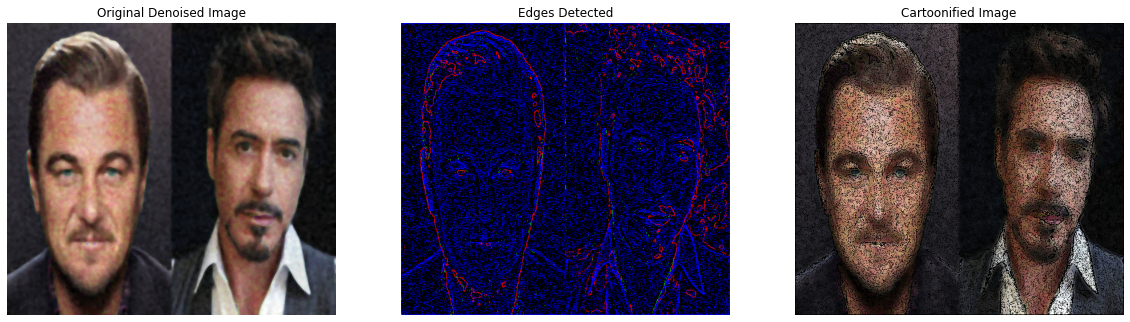

In [18]:
cartoonify(gaussian_final, "laplacian")

#### Salt & Pepper Noise Image

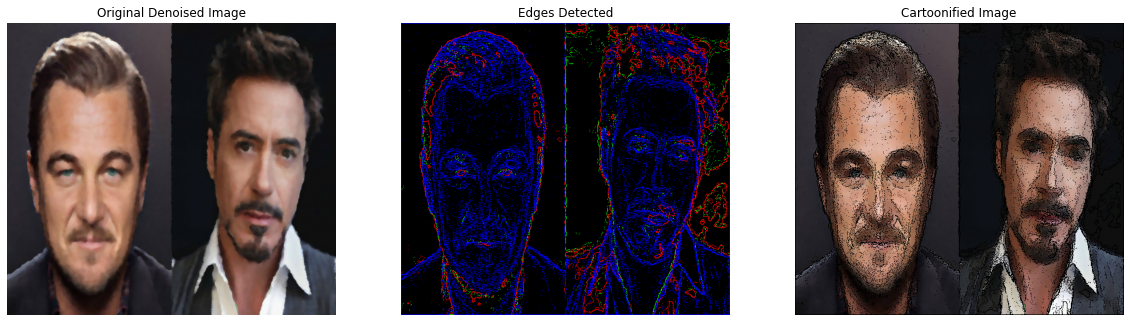

In [19]:
cartoonify(saltpepper_final, "laplacian")

### Canny

#### Gaussian Noise Image

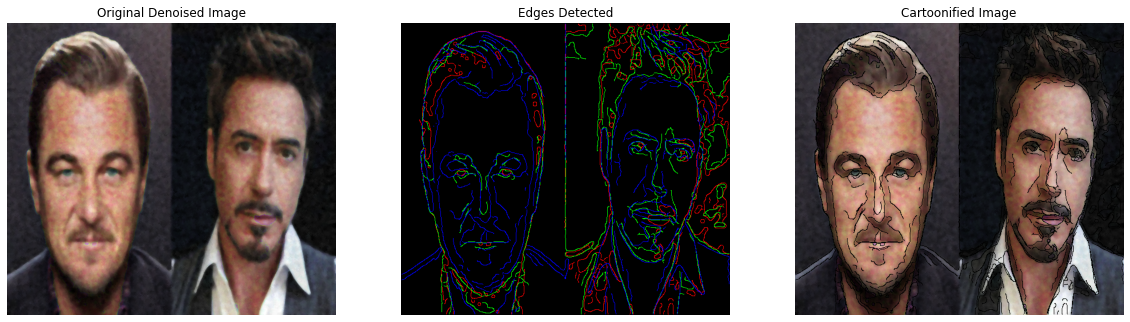

In [36]:
cartoonify(gaussian_final, "canny", 2)

#### Salt & Pepper Noise Image

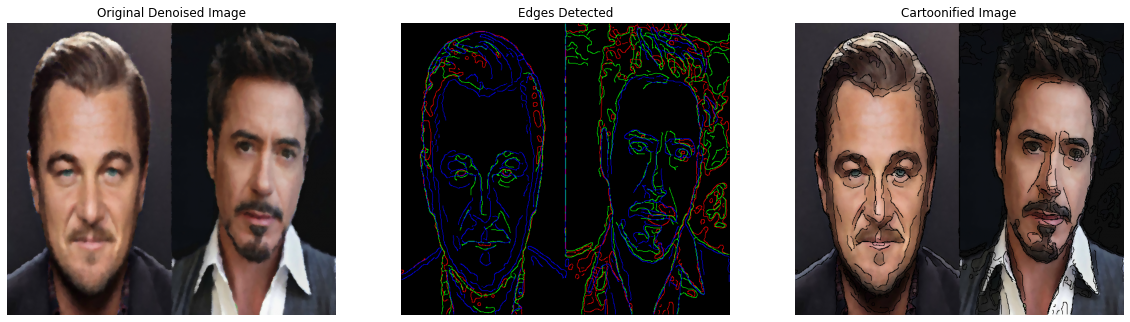

In [37]:
cartoonify(saltpepper_final, "canny", 2)

### Marr-Hildreth

#### Gaussian Noise Image

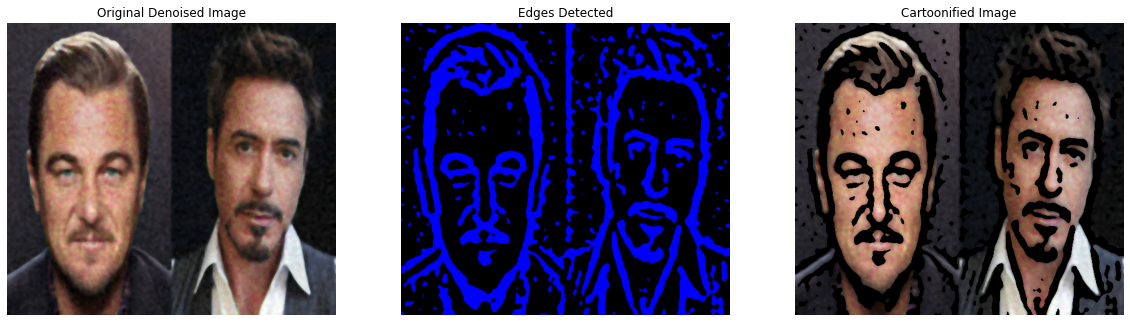

In [42]:
cartoonify(gaussian_final, method="marr-hildreth", sigma=5)

#### Salt & Pepper Noise Image

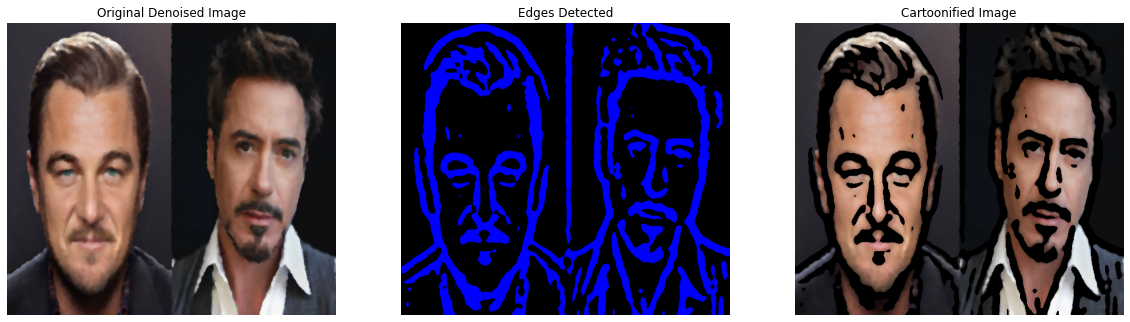

In [43]:
cartoonify(saltpepper_final, method="marr-hildreth", sigma=5)